In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [7]:
input_cols = ["pclass","sex","age","sibsp","parch","fare"]
output_cols = ["survived"]

In [8]:
train_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [9]:
X_train = train_data[input_cols]
Y_train = train_data[output_cols]
X_test = test_data[input_cols]

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1009 non-null   float64
 1   sex     1009 non-null   object 
 2   age     812 non-null    float64
 3   sibsp   1009 non-null   float64
 4   parch   1009 non-null   float64
 5   fare    1008 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.4+ KB


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  300 non-null    float64
 1   sex     300 non-null    object 
 2   age     234 non-null    float64
 3   sibsp   300 non-null    float64
 4   parch   300 non-null    float64
 5   fare    300 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.2+ KB


In [13]:
X_train = X_train.fillna(X_train["age"].mean())
X_train = X_train.fillna(X_train["fare"].mean())

X_test = X_test.fillna(X_test["age"].mean())

In [14]:
Y_train.head()

,survived
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [18]:
Y_train = np.array(Y_train).reshape((-1,))
print(Y_train)

[0. 0. 1. ... 1. 1. 0.]


In [19]:
Y_train.shape

(1009,)

In [20]:
rf = RandomForestClassifier(n_estimators=20,criterion='entropy',max_depth = 5)

In [22]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3.0,female,29.838978,0.0,0.0,7.750
1,2.0,male,39.000000,0.0,0.0,26.000
2,2.0,female,40.000000,0.0,0.0,13.000
3,3.0,female,31.000000,1.0,1.0,20.525
4,3.0,female,29.838978,2.0,0.0,23.250


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train["sex"] = le.fit_transform(X_train["sex"])
X_test["sex"] = le.transform(X_test["sex"])

In [26]:
X_train.info(),X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1009 non-null   float64
 1   sex     1009 non-null   int32  
 2   age     1009 non-null   float64
 3   sibsp   1009 non-null   float64
 4   parch   1009 non-null   float64
 5   fare    1009 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 43.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  300 non-null    float64
 1   sex     300 non-null    int32  
 2   age     300 non-null    float64
 3   sibsp   300 non-null    float64
 4   parch   300 non-null    float64
 5   fare    300 non-null    float64
dtypes: float64(5), int32(1)
memory usage: 13.0 KB


(None, None)

In [27]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=20)

In [28]:
rf.score(X_train,Y_train)

0.8334985133795837

In [34]:
from sklearn.model_selection import cross_val_score
l = []
for i in range(1,30):
    acc = cross_val_score(RandomForestClassifier(n_estimators = i,criterion='entropy',max_depth = 5),X_train,Y_train,cv = 10).mean() 
    l.append(acc)

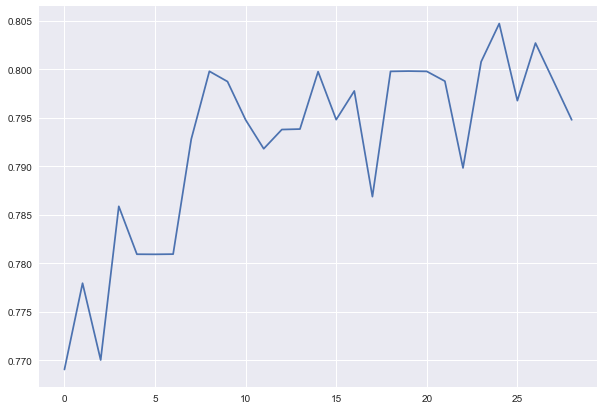

In [35]:
plt.style.use("seaborn")
plt.figure(figsize = (10,7))
plt.plot(l)
plt.show()

In [36]:
np.argmax(l)

24

In [37]:
rf = RandomForestClassifier(n_estimators=22,criterion='entropy',max_depth = 5)
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=22)

In [38]:
rf.score(X_train,Y_train)

0.8364717542120912

In [39]:
rf.predict(X_test)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0.

In [40]:
Y_pred = rf.predict(X_test).reshape((-1,1))

In [41]:
Id = np.arange(300).reshape((-1,1))

In [42]:
Y_test = np.hstack((Id,Y_pred))

In [43]:
Y_test

array([[  0.,   0.],
       [  1.,   0.],
       [  2.,   0.],
       [  3.,   0.],
       [  4.,   0.],
       [  5.,   1.],
       [  6.,   0.],
       [  7.,   0.],
       [  8.,   0.],
       [  9.,   0.],
       [ 10.,   0.],
       [ 11.,   0.],
       [ 12.,   0.],
       [ 13.,   0.],
       [ 14.,   1.],
       [ 15.,   0.],
       [ 16.,   0.],
       [ 17.,   1.],
       [ 18.,   0.],
       [ 19.,   0.],
       [ 20.,   1.],
       [ 21.,   0.],
       [ 22.,   0.],
       [ 23.,   0.],
       [ 24.,   0.],
       [ 25.,   1.],
       [ 26.,   0.],
       [ 27.,   1.],
       [ 28.,   1.],
       [ 29.,   0.],
       [ 30.,   0.],
       [ 31.,   1.],
       [ 32.,   0.],
       [ 33.,   0.],
       [ 34.,   0.],
       [ 35.,   1.],
       [ 36.,   0.],
       [ 37.,   0.],
       [ 38.,   0.],
       [ 39.,   0.],
       [ 40.,   1.],
       [ 41.,   1.],
       [ 42.,   0.],
       [ 43.,   0.],
       [ 44.,   0.],
       [ 45.,   0.],
       [ 46.,   1.],
       [ 47.,

In [46]:
Predictions = pd.DataFrame(Y_test,columns = ["Id","survived"]).astype('int32')

In [47]:
Predictions.to_csv("Titanic_survivor_prediction.csv",index = False)